In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:

# Set random seed for reproducibility
np.random.seed(42)

# List of tech companies (expanded from the original)
companies = [
    'Amazon', 'Google', 'Facebook', 'Apple', 'Microsoft', 'Netflix', 'Tesla', 
    'Twitter', 'Uber', 'Airbnb', 'Spotify', 'Adobe', 'Intel', 'IBM', 'Oracle',
    'Salesforce', 'Cisco', 'Dell', 'HP', 'Nvidia', 'AMD', 'Qualcomm', 'Samsung',
    'Sony', 'LG', 'Panasonic', 'Docusign', 'Zoom', 'Slack', 'Atlassian',
    'Shopify', 'Square', 'Stripe', 'Palantir', 'Snowflake', 'Databricks',
    'MongoDB', 'Elastic', 'Twilio', 'Okta', 'Cloudflare', 'Fastly', 'PagerDuty',
    'ServiceNow', 'Workday', 'Splunk', 'Zscaler', 'CrowdStrike', 'Fortinet',
    'PaloAlto', 'VMware', 'RedHat', 'GitHub', 'GitLab', 'DigitalOcean'
]

# Generate random data for 50 companies
# Generate realistic correlated data
data = []
for i in range(50):
    company = np.random.choice(companies)
    
    # Radio ad spend between 35–45 (congested range)
    radio = round(np.random.uniform(35.0, 45.0), 1)
    
    # Sales ~ proportional to radio spend + some random noise
    sales = round(0.6 * radio + np.random.normal(3, 1.5), 1)  
    
    data.append([company, radio, sales])

# Create DataFrame
df = pd.DataFrame(data, columns=['Company', 'Radio ($)', 'Sales'])



df.head()

,Company,Radio ($),Sales
0,Twilio,43.0,29.6
1,AMD,36.6,24.0
2,HP,36.0,21.6
3,Okta,42.1,27.5
4,Qualcomm,35.6,24.7


In [ ]:
df.Company.nunique()
np.random.uniform(35.0, 45.0 , 10).round(1) #low , high , size


array([43.2, 41.3, 43.2, 41.5, 37.1, 37.7, 37.1, 38.8, 35.4, 41.2])

In [ ]:
nrml = np.random.normal(3, 5, 5) #mean , std , size
nrml


array([ 5.65700005,  6.74552838, 12.04478415,  4.13492151,  1.64518869])

In [87]:
def predict_sales(radio , weight , bias):
    return radio * weight + bias

In [53]:
def cost_function(radio , sales , weight , bias):
    """
    sales is actual val of sales
    """
    companies = len(radio)
    total_error = 0.0
    for i in range(companies):
        total_error += (sales[i]- predict_sales(radio[i] , weight , bias))**2
    return total_error/companies

In [54]:
def update_weight(radio , sales , weight , bias , learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(radio)
    
    for i in range(companies):
        weight_deriv += -2 *radio[i] * (sales[i] - predict_sales(radio[i] , weight , bias))
        
        bias_deriv += -2 * (sales[i] - predict_sales(radio[i] , weight , bias))
        
    weight -= (weight_deriv/companies) * learning_rate
    bias -= (bias_deriv/companies) * learning_rate
    return weight , bias

In [55]:
def train(radio , sales , weight , bias , learning_rate , iters):
    cost_history = []
    record = {}
    for i in range(iters):
        
        weight , bias = update_weight(radio , sales , weight , bias , learning_rate)
        
        
        cost = cost_function(radio , sales , weight , bias)
        cost_history.append(cost)
        
        if i % 10 == 0:
            print(f"Iteration : {i} , weight : {weight} , bias : {bias} , cost : {cost}")
            
            record[i] = {'weight' : weight , 'bias' : bias , 'cost' : cost}
            print()
        
    return weight , bias , cost_history , record

In [207]:
weight = 0.0
bias = 0.0
learning_rate = 0.00001
iters = 125
radio = df['Radio ($)'].values
sales = df['Sales'].values

weight , bias , cost_history , record = train(radio , sales , weight , bias , learning_rate , iters)


Iteration : 0 , weight : 0.021417464000000008 , bias : 0.0005341200000000001 , cost : 674.3611302115658

Iteration : 10 , weight : 0.20131799473326994 , bias : 0.005020029637248953 , cost : 352.92406346938617

Iteration : 20 , weight : 0.3313033319224482 , bias : 0.008260334796856122 , cost : 185.11336689875793

Iteration : 30 , weight : 0.4252229495614719 , bias : 0.010600641007765062 , cost : 97.50545603325773

Iteration : 40 , weight : 0.49308364537097765 , bias : 0.012290662058440654 , cost : 51.76852622185459

Iteration : 50 , weight : 0.5421157300953 , bias : 0.013510826127622097 , cost : 27.89092509858785

Iteration : 60 , weight : 0.5775433918232845 , bias : 0.014391499775695472 , cost : 15.425290895289583

Iteration : 70 , weight : 0.6031413149568461 , bias : 0.01502687804572811 , cost : 8.917432927504729

Iteration : 80 , weight : 0.6216368596315204 , bias : 0.015485020615847422 , cost : 5.519915002008368

Iteration : 90 , weight : 0.6350006523995928 , bias : 0.01581510331989

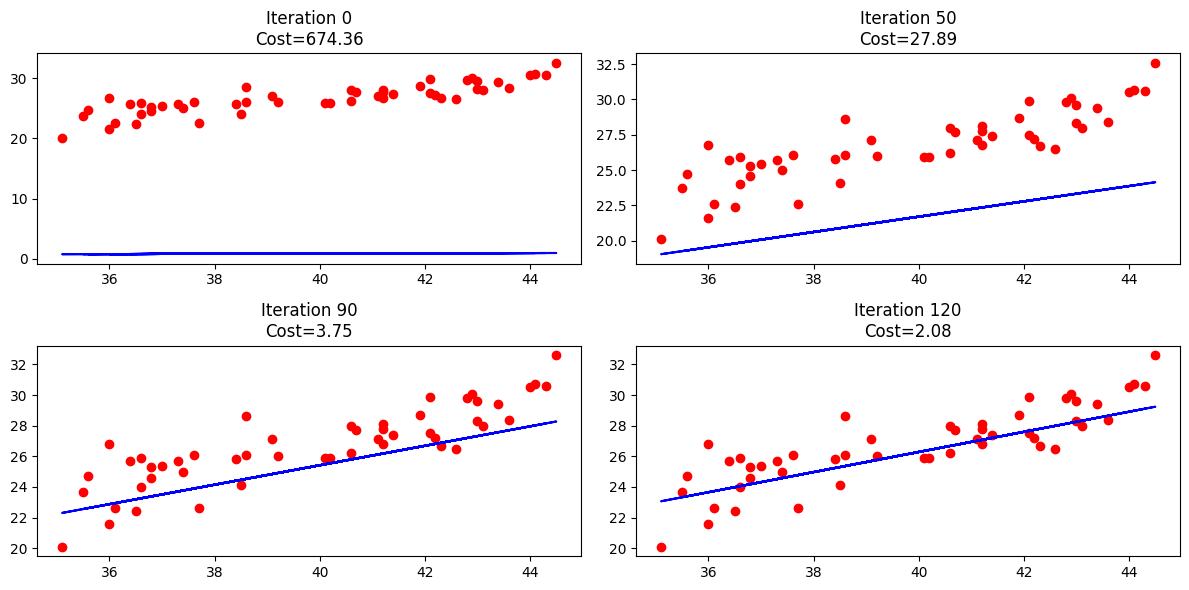

In [188]:
fig , ((ax1 , ax2) , (ax3 , ax4)) = plt.subplots(2 , 2 , figsize = (12 , 6))

axes = [ax1, ax2, ax3, ax4]
iterations = [0, 50, 90, 120 ]   # which iterations to show
 


for ax, it in zip(axes, iterations):
    ax.scatter(df['Radio ($)'], df['Sales'], color='red')
    
    y_pred = df['Radio ($)'] * record[it]['weight'] + record[it]['bias']
    
    ax.plot(df['Radio ($)'], y_pred, color='blue')
    ax.set_title(f"Iteration {it}\nCost={record[it]['cost']:.2f}")

plt.tight_layout()
plt.show()


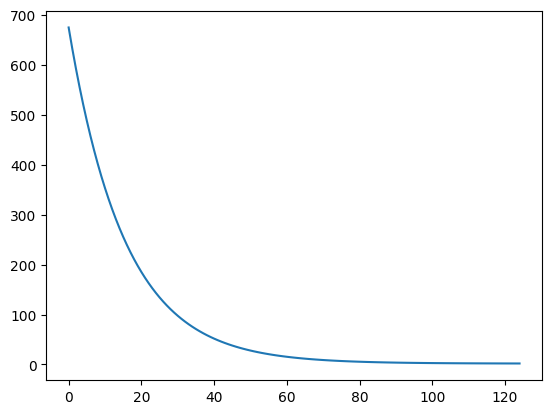

In [189]:
plt.plot(cost_history)